<a href="https://colab.research.google.com/github/MileParamo/Sprint-2-version-1/blob/main/F_Modelo_clasificacion_supervisada_car_guia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 2 – Modelos de clasificación supervisada para evaluar la calidad de un automovil

## MACHINE LEARNING

### ESTUDIANTES:


*   WILLIAM ÁVILA R.
*   ELIANA CAROLINA POVEDA
*   LUZ ANGELA ROJAS PRIETO
*   MILENA PÁRAMO BERNAL




## EXPLICACIÓN DE LA BASE DE DATOS

Los registros de la base de datos "Car Evaluation" contiene un conjunto de datos diseñado para clasificar la aceptabilidad de automóviles en función de tres conceptos intermedios: PRECIO, TECNOLOGÍA, CONFORT (comodidad). Cada una de las siguientes variables se asocia con alguno de estos conceptos intermedios.

### Variables del data-frame:

*   **buying (precio de compra)**: Representa el costo de compra del automóvil y tiene cuatro categorías: vhigh (muy alto), high (alto), med (medio) y low (bajo).
*   **maint (costo de mantenimiento)**: Indica el costo de mantenimiento del automóvil, también tiene cuatro categorías: vhigh (muy alto), high (alto), med (medio) y low (bajo).
*   **doors (número de puertas)**: Especifica el número de puertas del automóvil. Sus categorías: 2, 3, 4, o 5more (5 o más puertas)
*   **persons (capacidad de personas)**: Indica la cantidad de personas que el vehículo puede acomodar. Las categorías: 2, 4, more (+de 4 personas)
*   **lug_boot (tamaño del maletero)**: Indica tamaño del maletero en tres categorías: small (pequeño), med (mediano), big (grande).
*   **safety (nivel de seguridad)**: Indica el nivel de seguridad del automóvil y está clasificado en tres niveles: low (bajo), med (medio), high (alto)
*   **class (clasificación de aceptabilidad)**: Es la variable objetivo y determina la aceptabilidad del automóvil en cuatro categorías: unacc (inaceptable), acc (aceptable), good (bueno), vgood (muy bueno).


La variable class es la variable objetivo, y sobre ella haremos una partición adecuada para realizar los procesos de entrenamiento y testeo, aplicando varios modelos de aprendizaje.

El tamaño de la base car.evaluation
(1728, 7)

Saque sus conclusiones, si ve la posibilidad de reentrenar el modelo y mejorar sus resultados hágalo. En un párrafo explique ¿Cuál de los modelos fue mejor? Justifique adecuadamente su respuesta

## CARGAR LIBRERÍAS

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import sklearn_pandas as skpd


## BAJAR LA BASE DE DATOS

In [97]:

column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data", header=None, names= column_names)
df_car= df.copy()
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## EXPLORACIÓN DE LA BASE DE DATOS
#### Usamos algunos métodos para explorar la base head(); shape; columns; dtypes; info(); describe().

In [98]:
# Imprimir el nombre de las columnas
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [99]:
# imprimir el numero de columnas y filas del DataFrame
df.shape

(1728, 7)

In [100]:
# Imprimir el tipo de datos del DataFrame
df.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object
class,object



Todas las variables del dataset son categóricas, inclusive la variable doors que contine números pero también la clasificación '5more', de igual modo persons que contiene la clasificación 'more'. Dada esta eventualidad es necesario modificar las variables a valores numéricas para hacer los procesamientos del machine learning. Queremos que cada una de las categorías de las variables tomen valores como en el siguiente ejemplo, así:
buying: 'low': 0, 'med': 1, 'high': 2, 'vhigh': 3.

In [101]:
# Recuento de los valores por cada categoría.
for col in column_names:
  print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


###Los valores de las variables son equilibrados en cada categoría. Ejemplo de ello es la variable buying donde cada una de las categorías (vhigh, high, med y low) tiene una frecuencia de 432. No es muy interesante observar los histogramas en estas distribuciones. La variable 'class' es la única en donde los valores son diferentes entre si, y el mayor valor lo recibe la categoría 'unacc'.



In [102]:
# Imprimir información general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [103]:
df.describe(include='all')

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


## **REVISAR SI HAY DATOS NULOS**

* Para ver las posibles inconsistencias del dataset y definir los pasos a seguir.
En este caso no hay datos nulos.


In [104]:
print("Explorar los valores nulos por cada columna:")
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f"{column}: {null_count}")

Explorar los valores nulos por cada columna:
buying: 0
maint: 0
doors: 0
persons: 0
lug_boot: 0
safety: 0
class: 0


In [105]:
print("Explorar los valores por cada columna:")
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

Explorar los valores por cada columna:
buying: ['vhigh' 'high' 'med' 'low']
maint: ['vhigh' 'high' 'med' 'low']
doors: ['2' '3' '4' '5more']
persons: ['2' '4' 'more']
lug_boot: ['small' 'med' 'big']
safety: ['low' 'med' 'high']
class: ['unacc' 'acc' 'vgood' 'good']


## **VISUALIZACIÓN DE LOS DATOS**

Dado que los histogramas de cada variable son poco interesantes de objservar por cuantos las frecuencias son equilibradas, elegimos mostrar la distribución de las variables según la variable 'class'.


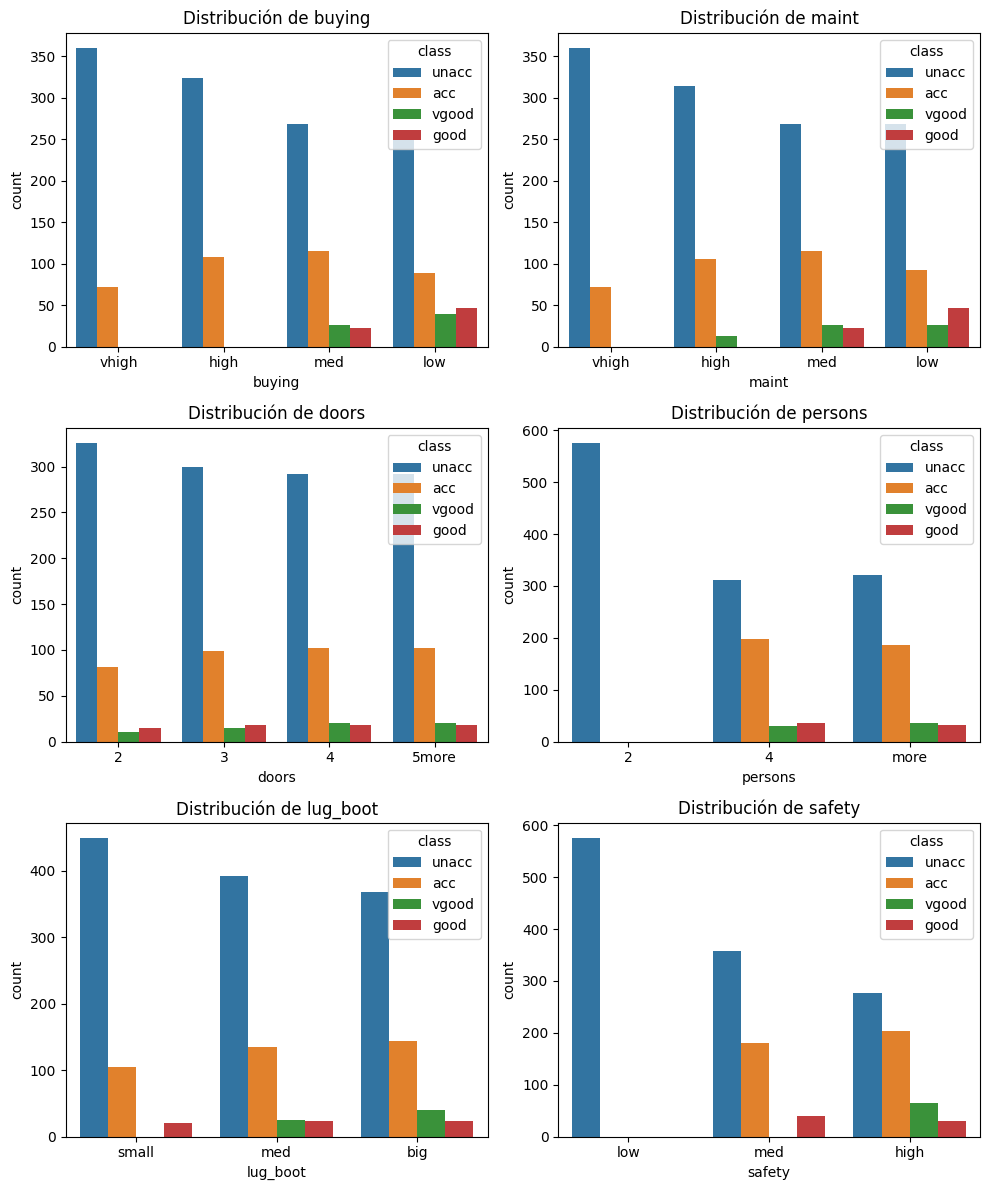

In [106]:
plt.figure(figsize=(10, 12))

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3,2,i+1)
    sns.countplot(data=df, x=col, hue="class")
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

##VERIFICAR SI HAY CORRELACIÓN

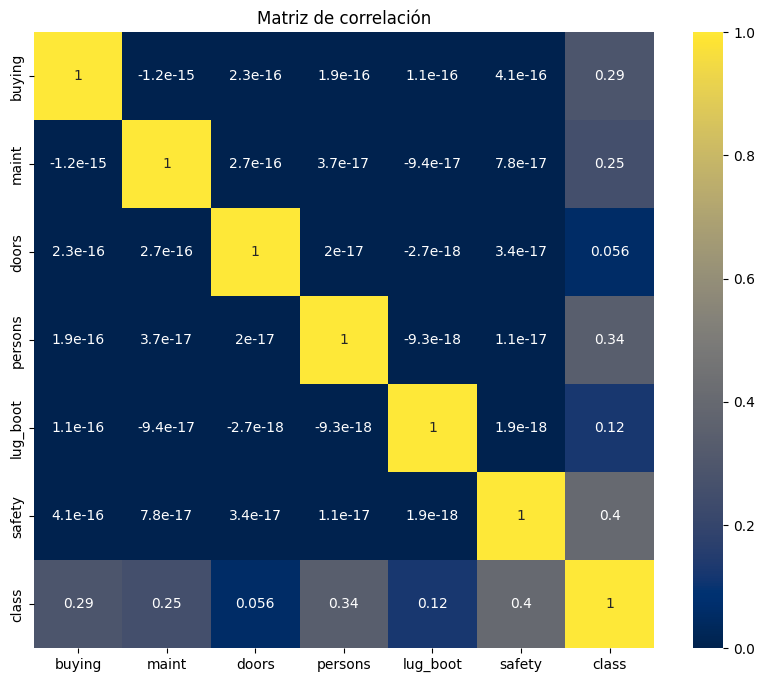

In [107]:
#Gráfico de correlación

#Convertir las columnas con 'vhigh' y otros valores no numéricos en representaciones numéricas.
for column in df.select_dtypes(include=['object']).columns:
    # Crear un mapping para valores únicos en la columna a valores numéricos
    unique_values = df[column].unique()
    value_mapping = {value: i for i, value in enumerate(unique_values)}
    # Sustituir los valores originales por números
    df[column] = df[column].map(value_mapping)

# Calculo de la matriz de correlación después de la conversión
correlation_matrix = df.corr()

# Crear una matriz de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis')
plt.title('Matriz de correlación')
plt.show()

##PREPARACIÓN DE LOS DATOS Y ENTRENAMIENTO

In [108]:
import category_encoders as ce
from sklearn.model_selection import train_test_split


# 1. División de los datos en conjuntos de entrenamiento y de prueba antes de codificarlos:
x = df.drop(columns=['class']) # 'class' is la categoría target
y = df['class']
x_train, x_test, _, _ = train_test_split(x, y, test_size=0.2, random_state=42)

# 2. Agegar los nombres de las columnas
column_names = x_train.select_dtypes(include=['object']).columns.tolist()

# 3. Inicializa el OrdinalEncoder con los nombres de las columnas:
encoder = ce.OrdinalEncoder(cols=column_names)

# 4. Ajustar y transformar los datos de entrenamiento:
x_train = encoder.fit_transform(x_train)

# 5. Transformación de los datos de prueba:
x_test = encoder.transform(x_test)



In [109]:
x

,buying,maint,doors,persons,lug_boot,safety
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,2
3,0,0,0,0,1,0
4,0,0,0,0,1,1
...,...,...,...,...,...,...
1723,3,3,3,2,1,1
1724,3,3,3,2,1,2
1725,3,3,3,2,2,0
1726,3,3,3,2,2,1


In [110]:
#Verificar el cambio de tipo de dato a numérico
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
dtypes: int64(6)
memory usage: 81.1 KB


#ENTRENAMIENTO

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
models =  [("LR", LogisticRegression()),
          ("KNN", KNeighborsClassifier()),
          ("DT", DecisionTreeClassifier()),
          ("SVM", SVC())]

for name, model in models:
    model.fit(x_train, y_train)
    score = model.score(x_train, y_train)

    print("{}: {}".format(name, score))



LR: 0.7004341534008683
KNN: 0.7243125904486252
DT: 1.0
SVM: 0.7004341534008683


* LR: 0.7004341534008683
* KNN: 0.7243125904486252
* DT: 1.0
* SVM: 0.7004341534008683

Los anteriores resultados representan la precisión de los modelos de clasificación en el conjunto de datos de entrenamiento.

* **LR (Regresión Logística)**: El modelo de regresión logística predijo correctamente alrededor del 70% de los datos de entrenamiento.

* **KNN (K-Nearest Neighbors)**: El modelo K-Nearest Neighbors predijo correctamente alrededor del 72% de los datos de entrenamiento..

* **DT (Árbol de Decisión)**: El modelo de árbol de decisión predijo correctamente el 100% de los datos de entrenamiento. Esto es un signo de posible sobreajuste, lo que significa que puede haber memorizado los datos de entrenamiento y podría no funcionar bien con datos nuevos que no se han visto. Es necesario validar su rendimiento en el conjunto de prueba.

* **SVM**: El modelo Support Vector Machine predijo correctamente alrededor del 70% de los datos de entrenamiento.


# PRUEBA

In [112]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print("DT", score)

DT 0.5173410404624278


In [113]:
from sklearn.metrics import classification_report
preds = model.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       242
           1       0.24      0.29      0.26        77
           2       0.08      0.08      0.08        13
           3       0.05      0.07      0.06        14

    accuracy                           0.52       346
   macro avg       0.27      0.27      0.27       346
weighted avg       0.55      0.52      0.53       346



## Interpretación de los datos del informe de clasificación

El informe se generó ejecutando el modelo DecisionTreeClassifier entrenado en el conjunto de datos de prueba y comparando sus predicciones con los valores reales de la variable «clase» (unacc, acc, good, vgood).

Ese resultado de 0.5173 representa la exactitud o accuracy del modelo DecisionTreeClassifier, indicando que el modelo clasifica correctamente aproximadamente el 51.7% de las instancias en el conjunto de prueba. La exactitud de 0.5173 significa que el modelo es capaz de acertar en poco más de la mitad de las predicciones. Esto es consistente con el 52% de accuracy que observaste en el reporte de clasificación, por lo cual, su rendimiento es bajo. Esto puede deberse a un desbalance en las clases o a que el modelo de árbol de decisión no está capturando suficientemente bien las relaciones en los datos de la base "car evaluation."

* **Precisión**:
Representa la capacidad del modelo para identificar correctamente los casos positivos por cada clase, en este caso ['unacc' 'acc' 'vgood' 'good']

**Clase 0 (Precision: 0.71, Recall: 0.64, F1-score: 0.67)**:

Es la clase mejor puntuada con una precisión moderada, lo que indica que el modelo identifica correctamente el 71% de los elementos etiquetados como clase 0: 'unacc'.
El recall de 0.64 indica que el modelo captura el 64% de las instancias reales de esta clase, y el F1-score de 0.67 refleja un balance entre precisión y recall.

**Clase 1 (Precision: 0.24, Recall: 0.29, F1-score: 0.26)**:

La precisión y el recall son bajos, lo que sugiere que el modelo tiene dificultades para identificar correctamente esta clase, clasificando incorrectamente muchas instancias.

**Clase 2 (Precision: 0.00, Recall: 0.00, F1-score: 0.00)**:

La precisión, el recall y el F1-score son 0, lo cual sugiere que el modelo no clasifica correctamente ninguna instancia de la clase 2.

**Clase 3 (Precision: 0.05, Recall: 0.07, F1-score: 0.06)**:

La precisión y el recall también son extremadamente bajos, por lo que el modelo tiene serias dificultades para identificar esta clase.


* **accuracy**:
Es la precisión global del modelo, calculada como el número de predicciones correctas dividido por el número total de predicciones.

En este caso el modelo clasifica correctamente el 52% de todas las instancias, lo cual no es un buen rendimiento.

* **Macro avg**:
Es el promedio no ponderado de las métricas, útil para observar el rendimiento del modelo en cada clase sin considerar el tamaño de la clase. Aquí es muy bajo (0.25), lo que indica que el modelo tiene problemas en general en clases menos representadas.

* **weighted avg**:

Es la media de la precisión, recall y la puntuación F1 de cada clase. Se trata del promedio ponderado por el tamaño de cada clase. Refleja mejor el rendimiento general dado el sesgo hacia la clase 0, con un F1-score ponderado de 0.53.

En resumen, el modelo tiene un rendimiento pobre en las clases minoritarias (clases 1, 2, y 3). Esto podría mejorarse con otras técnicas. Esperamos pronto aprender a hacerlo.
